# UFC DATA ANALYSIS

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'C:\Users\mkaan\Downloads\GithubDesktop\Data-Analytics-Portfolio\UFC_Gambling_Experiment\Data\ufc-master.csv')

In [7]:
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,Duane Ludwig,Darren Elkins,-155.0,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
4892,John Howard,Daniel Roberts,-210.0,175,47.619048,175.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
4893,Brendan Schaub,Chase Gormley,-260.0,220,38.461538,220.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
4894,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check for Null Values
df.isnull().sum()

R_fighter        0
B_fighter        0
R_odds           1
B_odds           0
R_ev             1
              ... 
b_dec_odds     819
r_sub_odds    1049
b_sub_odds    1061
r_ko_odds     1049
b_ko_odds     1062
Length: 119, dtype: int64

In [9]:
df[df['R_odds'].isna()]

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
32,Rong Zhu,Brandon Jenkins,NaN,195,NaN,195.0,18/09/2021,"Las Vegas, Nevada, USA",USA,Red,...,Punches,3.0,4:35,875.0,NaN,500.0,NaN,1600.0,NaN,450.0


In [10]:
# Drop Null Values from columns that are going to be used
df = df[df['R_odds'].notna()]
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,Duane Ludwig,Darren Elkins,-155.0,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
4892,John Howard,Daniel Roberts,-210.0,175,47.619048,175.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
4893,Brendan Schaub,Chase Gormley,-260.0,220,38.461538,220.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
4894,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


Red     2858
Blue    2037
Name: Winner, dtype: int64


<AxesSubplot:title={'center':'Number Of Wins'}>

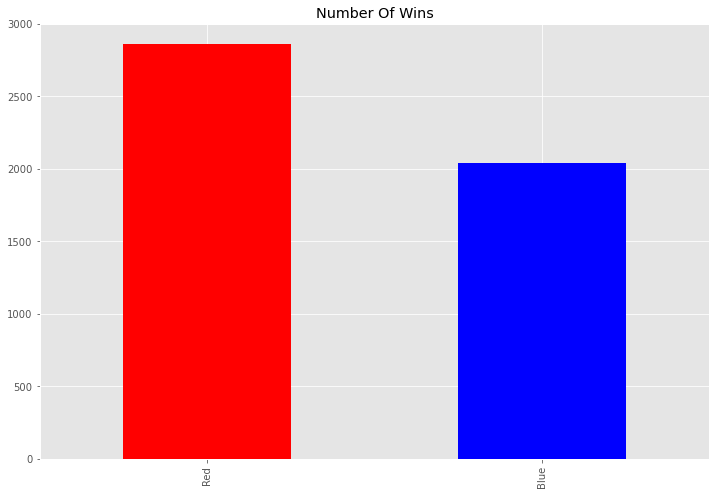

In [11]:
# Comparing the number of wins by color
print(df['Winner'].value_counts())
df['Winner'].value_counts().plot(kind='bar', color = ['red', 'blue'], title='Number Of Wins')

In [12]:
# Using difference between R_odds and B_odds to create a new column which outlines the favourite in each matchup
def favourite(R_odds, B_odds):
    if R_odds < B_odds:
        return('Red')
    if R_odds > B_odds:
        return('Blue')
    if R_odds == B_odds:
        return('Even')

df['Favourite'] = df.apply(lambda x: favourite(x['R_odds'], x['B_odds']), axis = 1)
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,Favourite
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0,Red
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0,Blue
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0,Blue
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0,Red
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,Duane Ludwig,Darren Elkins,-155.0,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN,Red
4892,John Howard,Daniel Roberts,-210.0,175,47.619048,175.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN,Red
4893,Brendan Schaub,Chase Gormley,-260.0,220,38.461538,220.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN,Red
4894,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN,Red


Red     3078
Blue    1718
Even      99
Name: Favourite, dtype: int64


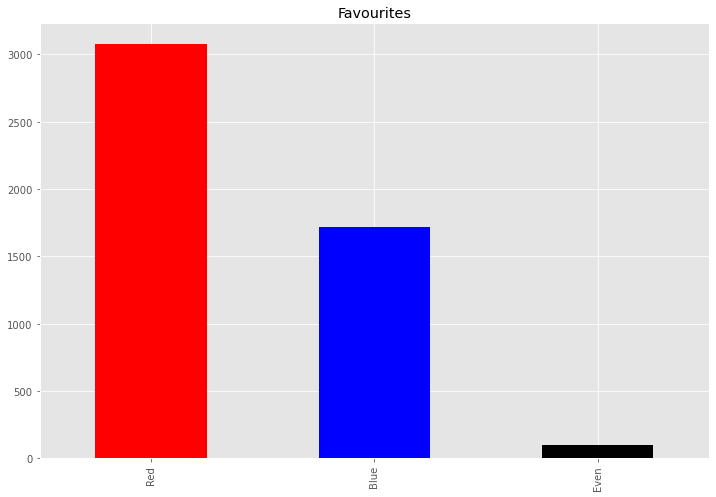

In [13]:
# Comparing the number of favourites by color
print(df['Favourite'].value_counts())
df['Favourite'].value_counts().plot(kind='bar', color = ['red', 'blue', 'black'], title = 'Favourites')
plt.show()

In [14]:
# Using the Winner and Favourite columns to create a new column which outline whether the favourite won the fight
def favourite(Winner, Favourite):
    if Winner == Favourite:
        return('True')
    if Favourite == 'Even':
        return('NoFav')
    if Winner != Favourite:
        return('False')

df['FavWon'] = df.apply(lambda x: favourite(x['Winner'], x['Favourite']), axis = 1)
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,Favourite,FavWon
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0,Red,True
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0,Blue,True
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0,Blue,True
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0,Red,True
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0,Red,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,Duane Ludwig,Darren Elkins,-155.0,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN,Red,False
4892,John Howard,Daniel Roberts,-210.0,175,47.619048,175.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN,Red,True
4893,Brendan Schaub,Chase Gormley,-260.0,220,38.461538,220.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN,Red,True
4894,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN,Red,True


True     3138
False    1658
NoFav      99
Name: FavWon, dtype: int64


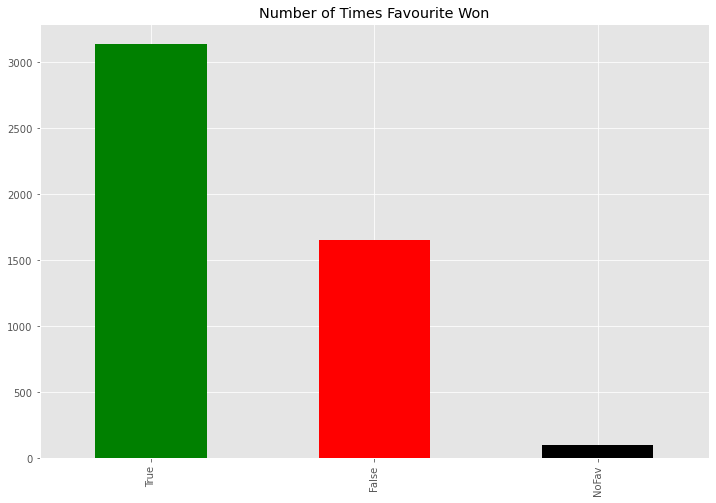

In [15]:
# Visualising how many times the favourite won 
print(df['FavWon'].value_counts())
df['FavWon'].value_counts().plot(kind='bar', color = ['green', 'red', 'black'], title = 'Number of Times Favourite Won')
plt.show()

In [16]:
# Create a column with the profit gained on a 100 unit bet placed on the winner of each fight
def WinnerEV(Winner, R_ev, B_ev):
    if Winner == 'Red':
        return(R_ev)
    if Winner == 'Blue':
        return(B_ev)

df['Winner_ev'] = df.apply(lambda x: WinnerEV(x['Winner'], x['R_ev'], x['B_ev']), axis = 1)
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,Favourite,FavWon,Winner_ev
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0,Red,True,66.666667
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,900.0,450.0,350.0,700.0,1100.0,550.0,120.0,Blue,True,50.000000
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,900.0,550.0,275.0,275.0,1400.0,600.0,185.0,Blue,True,76.923077
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Red,...,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0,Red,True,14.814815
4,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,2/10/2021,"Las Vegas, Nevada, USA",USA,Blue,...,900.0,165.0,200.0,400.0,1200.0,900.0,600.0,Red,False,115.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,Duane Ludwig,Darren Elkins,-155.0,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,44.0,NaN,NaN,NaN,NaN,NaN,NaN,Red,False,135.000000
4892,John Howard,Daniel Roberts,-210.0,175,47.619048,175.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,121.0,NaN,NaN,NaN,NaN,NaN,NaN,Red,True,47.619048
4893,Brendan Schaub,Chase Gormley,-260.0,220,38.461538,220.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,47.0,NaN,NaN,NaN,NaN,NaN,NaN,Red,True,38.461538
4894,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,900.0,NaN,NaN,NaN,NaN,NaN,NaN,Red,True,23.809524


In [17]:
# Seperate the df into whether the favurite won or lost
df_favwon = df[df['FavWon'] == 'True']
df_favlost = df[df['FavWon'] == 'False']
df_favlost.shape

(1658, 122)

In [18]:
# The profit gained if a 100 unit bet was placed on each favourite in the dataset
df_favwon['Winner_ev'].sum() - (1658*100)

-18999.53488284399